# WeatherPy

SEE OBSERVATIONS AND COMMENTS BELOW EACH GRAPH


In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Set todays date to include in plots
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y")

print(weather_api_key)

8340998d9f2e64d141c5b5b39fe77888


## Generate Cities List and dataframe

In [17]:
#Initialize empty lists for: Lat/Lng pairs, cities, countries, latitude, and longitude 
#(the original pairs used to find the "nearest city"). Note this is NOT the actual lat/lng of the city, 
#this is captured later from the OpenWeather API

#Reinitialize lists to null
cities = []
countries=[]
orig_latitude=[]
orig_longitude=[]
city_ID=[]
city_temp=[]
city_humidity=[]
city_clouds_pct=[]
city_windspeed=[]
city_latitude=[]
city_longitude=[]

#How many cities do you want to plot?
target_city_count = 501

#Set counter of OpenWeather API attempts to prevent infinite loop indefinite API calls
openweather_attempts = 0

#Set counter to test if we have found the requested number of cities that are in citypy, 
#OpenWeather, and with humidity<=100. This ensures the final city list will meet the target number precisely.
big_city_count = 0
while big_city_count<target_city_count:
    
    #Control to break out of the while loop if taking excessive attempts to build a nonduplicating list. Prevent accidental infinite loop and API calls.
    if openweather_attempts>=1.5*target_city_count:
        print(f'Excessive OpenWeather API attempts. Terminating dataframe build. Unable to achieve the target of {target_city_count} cities.')
        break
        
    #Get a random lat long coordinate
    lats = np.random.uniform(lat_range[0], lat_range[1])
    lngs = np.random.uniform(lng_range[0], lng_range[1])
    
    #Get the nearest city and it's country from citipy
    city = citipy.nearest_city(lats, lngs).city_name
    
    #Ensure no duplicate cities
    if city in cities:
        continue
    country = citipy.nearest_city(lats, lngs).country_code
    
    #Create the OpenWeather url using the city and country from citypy and weather api key
    base_url = 'http://api.openweathermap.org/data/2.5/weather'
    params = {
        'q': f'{city},,{country}',
        'units': 'imperial',
        'appid':weather_api_key
    }
    
    #Get the response from OpenWeather API
    openweather_attempts+=1
    res = requests.get(base_url, params)
    
    #If response is 200 then OpenWeather has data on this city so proceed to read json data add the city to the df
    if res.status_code == 200:
        response = res.json()
        
        #Read the weather stats from OpenWeather response. If missing data skip, ensure each city has all data.
        try:
            #Check for humidity not over 100 as per instructions
            if response['main']['humidity']<=100:
                #Print the city ID and name as they are being processed to show progress
                cityid=response['id']
                print(f'{cityid} {city}')
                #Append all the necessary data to lists
                cities.append(city)
                countries.append(country)
                orig_latitude.append(lats)
                orig_longitude.append(lngs)
                city_ID.append(response['id'])
                city_temp.append(response['main']['temp'])
                city_humidity.append(response['main']['humidity'])
                city_clouds_pct.append(response['clouds']['all'])
                city_windspeed.append(response['wind']['speed'])
                city_latitude.append(response['coord']['lat'])
                city_longitude.append(response['coord']['lon'])
                big_city_count += 1
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")

#Create the city df that has the exact number of desired cities with no city with humidity >100
city_data = pd.DataFrame(columns=['City ID', 'City', 'Country', 'Orig Lat', 'Orig Lon', 'Act Lat', 'Act Lon', 'Temperature (F)', 'Humidity', 'Cloudiness', 'Wind Speed'])

#Add the lists from the loops to the df
city_data['City ID'] = city_ID
city_data['City'] = cities
city_data['Country'] = countries
city_data['Orig Lat'] = orig_latitude
city_data['Orig Lon'] = orig_longitude
city_data['Act Lat'] = city_latitude
city_data['Act Lon'] = city_longitude
city_data['Temperature (F)'] = city_temp
city_data['Humidity'] = city_humidity
city_data['Cloudiness'] = city_clouds_pct
city_data['Wind Speed'] = city_windspeed

#Set df index to the unique city ID from OpenWeather API
city_data.set_index('City ID', inplace=True)

#Clean up by deleting columns not needed for plot. Delete the original lat and long 
#since they are not the actual lat and long of the city itself.
del city_data['Orig Lat']
del city_data['Orig Lon']

#Create the northern and southern hemisphere splits of the city df
north_city_data = city_data.loc[city_data['Act Lat']>=0]
south_city_data = city_data.loc[city_data['Act Lat']<0]

#Export the City_Data and Clean_city_data into csv's
city_data.to_csv(output_data_file)
print(city_data)

#Control check output
print('Total OpenWeather API attempts= '+str(openweather_attempts))
print('The total number of cities added is '+str(len(city_data)))


2411397 georgetown
3833367 ushuaia
370481 marawi
3372760 praia da vitoria
1650434 bambanglipuro
546105 nikolskoye
2155415 new norfolk
155052 malangali
3874787 punta arenas
4946620 palmer
2077963 albany
3374210 sao filipe
3395981 maceio
578638 bavly
1847947 shingu
146639 lasa
3374083 bathsheba
3459094 laguna
6162949 terrace
2013639 verkhnevilyuysk
2075265 busselton
5866583 kodiak
3674292 mosquera
2015306 tiksi
3416888 grindavik
746983 gelibolu
3651949 san cristobal
286987 nizwa
3022826 coutances
2017155 saskylakh
2074865 carnarvon
5042773 red wing
3939761 hualmay
95788 hit
3915350 guayaramerin
371745 kutum
3471451 arraial do cabo
1261910 nanjangud
3369157 cape town
100926 umm lajj
2729907 longyearbyen
2075720 broome
1278969 along
4020109 atuona
4689311 ennis
3430545 san miguel
5983720 iqaluit
3652764 puerto ayora
3372707 ribeira grande
5848280 kapaa
3883457 lebu
964420 port elizabeth
1516589 zhezkazgan
3899695 ancud
2121385 severo-kurilsk
1142226 dawlatabad
3831208 qaanaaq
4032243 vaini

1511146 azanka
2012938 yerofey pavlovich
1885823 jiangyou
2014624 udachnyy
2456917 goundam
2120048 ust-nera
2020707 londoko
1263952 manapparai
300791 simav
2109528 buala
2206874 waipawa
2029947 moron
5937252 deer lake
608270 shubarshi
5972762 hay river
2395317 banikoara
2960970 westport
2094027 kieta
866062 iskateley
2512186 puerto del rosario
2250645 kedougou
1651531 ambon
                       City Country  Act Lat  Act Lon  Temperature (F)  \
City ID                                                                  
2411397          georgetown      sh    -7.93   -14.42            81.19   
3833367             ushuaia      ar   -54.80   -68.30            46.40   
370481               marawi      sd    18.48    31.82            90.57   
3372760    praia da vitoria      pt    38.73   -27.07            62.60   
1650434       bambanglipuro      id    -7.95   110.28            79.36   
...                     ...     ...      ...      ...              ...   
2094027               kieta    

## Plotting the Data and Linear Regression


In [18]:
#A function which takes in: 1) x data, 2) y data, 3) name for x axis, 4) name for y axis, 5) indicate or whether 
#to draw linear regression or not: TRUE = include linear regression plot, FALSE = do not include linear regression.abs

def get_line(x,y,x_name,y_name, incl_regress):
    
    #Initialize the two plats: ax1=scatter, ax2=linear regression line    
    ax1=[]
    ax2=[]
    
    #count the number of cities in the plot to include in the title
    city_count = x.count()
    
    #Do scatter plot, titel, and labels
    ax1=plt.scatter(x,y)
    ax1=plt.title(f'{city_count} cities on {timestampStr}: {y_name} vs. {x_name}')
    ax1=plt.xlabel(x_name)
    ax1=plt.ylabel(f'{y_name}')
    
    #Include linear regression plot if flag indicates 
    if incl_regress:
        #Perform linear regression and r2 and plot
        slope, intercept, rvalue, pvalue, stderr = st.linregress(x,y)
        r_squared = rvalue**2
        ax2=plt.plot(x, x*slope+intercept, color='red', label= 'Y= '+str(round(slope,2))+'*X + '+str(round(intercept,2))+' R2='+str(round(r_squared,2)))
        #Use legend to show the linear regression equation and R2 value
        ax2=plt.legend()
        
    #Determine if plot is Global, Southern, or Northern hemisphere to include in file name
    if min(x)<0:
        if max(x)>0:
            hem='Global'
            ax1 = plt.xlim(-60, 90)
        else:
            hem='South'
            ax1 = plt.xlim(-60, 0)
    else:
        hem='North'
        ax = plt.xlim(0,90)
    
    #Define output png name
    png_file = 'output_data/'+y_name+'_'+x_name+'_'+hem+'.png'

    #retrun the two plots and the png file name
    return ax1, ax2, png_file

## Latitude vs. Temperature Plot

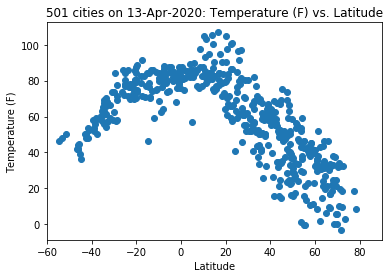

In [19]:
graph1, graph2, png_file = get_line(city_data['Act Lat'], city_data['Temperature (F)'], 'Latitude', 'Temperature (F)', False)
plt.savefig(png_file)
plt.show()

OBSERVATION TEMPERATURE VS. LATITUDE
- A blind linear regression would indicate a weak-to-medium relationship between temperature and latitude. However, visual inspection and common sense indicat that there is clearly a relationship of some sort with an inflection point near 0 degrees latitude. Therefore the data should be evaluated separately for each latitude.
- There are little to no cities in the Southern Hemisphere below -60 degrees latitude, therefore the x axis was limited to improve readability.
- The change in temp per change in lat (slope) appers higher in the north than the south.

## Latitude vs. Humidity Plot

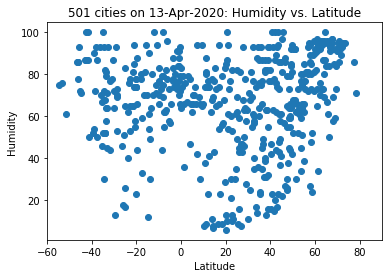

In [20]:
graph1, graph2, png_file = get_line(city_data['Act Lat'], city_data['Humidity'], 'Latitude', 'Humidity', False)
plt.savefig(png_file)
plt.show()

OBSERVATION HUMIDITY VS. LATITUDE
- There is no apparent relationship between humidity and latitude.
- Most cities tend to have humidity levels above about 50%

## Latitude vs. Cloudiness Plot

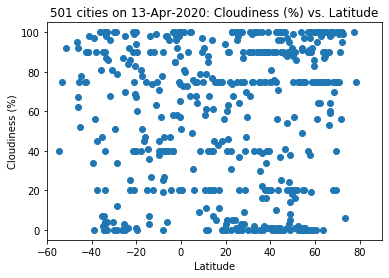

In [21]:
graph1, graph2, png_file = get_line(city_data['Act Lat'], city_data['Cloudiness'], 'Latitude', 'Cloudiness (%)', False)
plt.savefig(png_file)
plt.show()

OBSERVATIONS CLOUDINESS VS. LATITUDE
- There is no apparent relationship between cloudiness and latitude.
- Cloudiness appears to be bunched at multiple of 20% (20%, 40%, etc). This is likely due to the reporting framework and how cloudiness is measured.

## Latitude vs. Wind Speed Plot

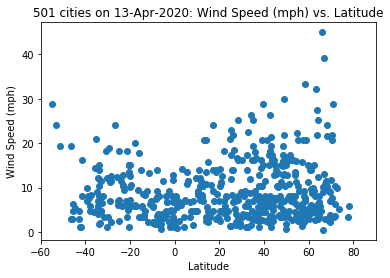

In [22]:
graph1, graph2, png_file = get_line(city_data['Act Lat'], city_data['Wind Speed'], 'Latitude', 'Wind Speed (mph)', False)
plt.savefig(png_file)
plt.show()

OBSERVATIONS WIND SPEED VS. LATITUDE
- There is no apparent relationship between wind speed and latitude.
- Wind speeds tend to occur between 0 and 18 mph

## Northern Hemisphere - Latitude vs. Temperature Plot 

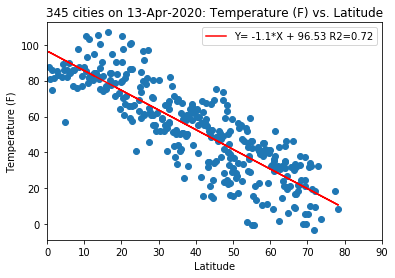

In [23]:
graph1, graph2, png_file = get_line(north_city_data['Act Lat'], north_city_data['Temperature (F)'], 'Latitude', 'Temperature (F)', True)
plt.savefig(png_file)
plt.show()

OBSERVATIONS TEMPERATURE VS. LATITUDE IN THE NORTHERN HEMISPHERE
- There is a strong linear relationship between temperature and latitude indicated by r-squared of 0.8.

## Southern Hemisphere - Latitude vs. Temperature Plot 

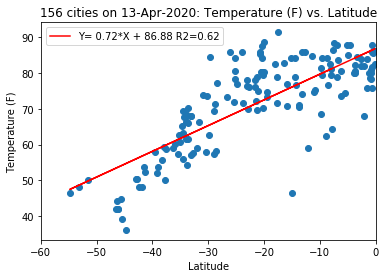

In [24]:
graph1, graph2, png_file = get_line(south_city_data['Act Lat'], south_city_data['Temperature (F)'], 'Latitude', 'Temperature (F)', True)
plt.savefig(png_file)
plt.show()

OBSERVATIONS TEMPERATURE VS. LATITUDE IN THE SOUTHERN HEMISPHERE
- There is a reasonably strong lineary relationship between temperature and latitude indicated by r-squared of 0.54.
- The r-squared is less than the northern hemispher. Likely due the lesser spread of data points due to the fact there are fewer cities at the more extreme latitudes in the southern hemisphere.
- The slope of the line is less than that in the northern hemispher, meaning the drop in temperature is less dramatic as latitude increases.
- The intercept of 84.44F indicates the estimated temperature at the equator. Interestingly this is materially different than the intercept of the northern hemisphere linear regression of 100.75F

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

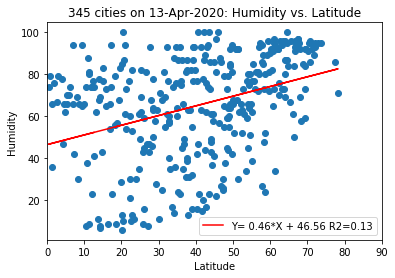

In [25]:
graph1, graph2, png_file = get_line(north_city_data['Act Lat'], north_city_data['Humidity'], 'Latitude', 'Humidity', True)
plt.savefig(png_file)
plt.show()

OBSERVATION HUMIDITY VS LATITUDE IN THE NORTHERN HEMISPHERE
- There is no apparent linear relationship as indicated by a low r-squared of 0.04
- There appears to be less variability in humidity levels ('bunching') at latitudes 50-80.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

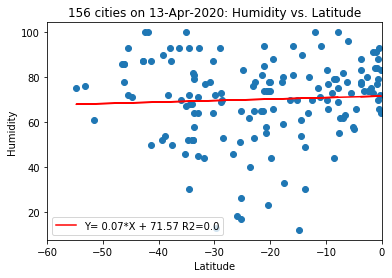

In [26]:
graph1, graph2, png_file = get_line(south_city_data['Act Lat'], south_city_data['Humidity'], 'Latitude', 'Humidity', True)
plt.savefig(png_file)
plt.show()

OBSERVATION HUMIDITY VS LATITUDE IN THE SOUTHERN HEMISPHERE
- There is no apparent linear relationship as indicated by a low r-squared of 0.05
- There appears to be less variability in humidity levels ('bunching') at latitudes 50-80.
- Again, the estimate of humidity at the equator as indicated by the intercepts is materially different based on northern vs southern data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

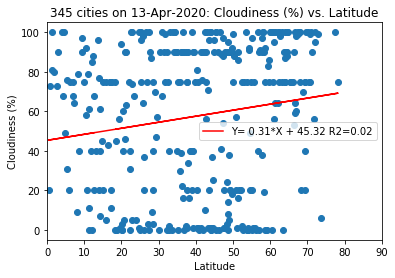

In [27]:
graph1, graph2, png_file = get_line(north_city_data['Act Lat'], north_city_data['Cloudiness'], 'Latitude', 'Cloudiness (%)', True)
plt.savefig(png_file)
plt.show()

OBSERVATION CLOUDINESS VS LATITUDE IN THE NORTHERN HEMISPHERE
- There is no apparent linear relationship as indicated by a low r-squared of 0.0
- Banding of reported values due to the reporting mechanism is apparent

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

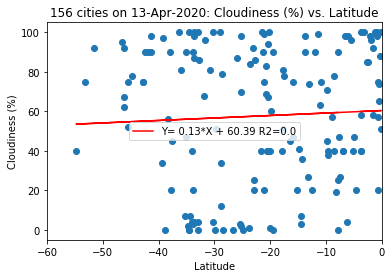

In [28]:
graph1, graph2, png_file = get_line(south_city_data['Act Lat'], south_city_data['Cloudiness'], 'Latitude', 'Cloudiness (%)', True)
plt.savefig(png_file)
plt.show()

OBSERVATION CLOUDINESS VS LATITUDE IN THE NORTHERN HEMISPHERE
- There is no apparent linear relationship as indicated by a low r-squared of 0.0
- Banding is less apparent in the southern data, possibly due to the lesser spread of latitude values in the data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

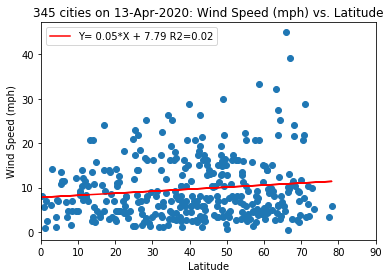

In [29]:
graph1, graph2, png_file = get_line(north_city_data['Act Lat'], north_city_data['Wind Speed'], 'Latitude', 'Wind Speed (mph)', True)
plt.savefig(png_file)
plt.show()

OBSERVATION WIND SPEED VS LATITUDE IN THE NORTHERN HEMISPHERE
- There is no apparent linear relationship as indicated by a low r-squared of 0.0
- Typical wind speeds tend to occur between 0-15 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

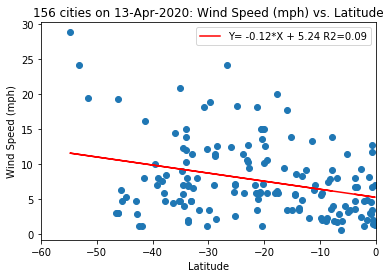

In [30]:
graph1, graph2, png_file = get_line(south_city_data['Act Lat'], south_city_data['Wind Speed'], 'Latitude', 'Wind Speed (mph)', True)
plt.savefig(png_file)
plt.show()

OBSERVATION WIND SPEED VS LATITUDE IN THE SOUTHERN HEMISPHERE
- There is no apparent linear relationship as indicated by a low r-squared of 0.05
- Typical wind speeds tend to occur between 0-15 mph.